## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
m1, m2 = np.mean(x_train, axis=0)
class_1, class_2 = [], []
for i in range(y_train.size):
    if y_train[i] == 0:
        class_1.append(x_train[i])
    else:
        class_2.append(x_train[i])
c1 = np.array(class_1)
c2 = np.array(class_2)
m1 = np.mean(c1, axis=0)
m2 = np.mean(c2, axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
sw = np.dot((c1 - m1).transpose(), c1 - m1)

In [7]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[69.47006077 -4.05640247]
 [-4.05640247 73.63343183]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
m21 = (m2 - m1)[:, None]
sb = np.dot(m21, m21.transpose())

In [9]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
w = np.dot(np.linalg.inv(sw), m21)
w = w / np.linalg.norm(w)

In [11]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.52465848]
 [ 0.8513128 ]]


In [12]:
z1 = c1.dot(w)
z2 = c2.dot(w)
z_test = x_test.dot(w)
y_pred = np.empty([250, 1])
z_train = x_train.dot(w)
for i in range(z_test.size):
    minimum = 100
    min_index = 0
    for j in range(z_train.size):
        if abs(z_test[i] - z_train[j]) < minimum:
            minimum = abs(z_test[i] - z_train[j])
            min_index = j
    y_pred[i] = y_train[min_index]

## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.888


## 6. Plot the 1) projection line 2) Decision boundary and colorize the data with each class
### the result should look like this [image](https://i2.kknews.cc/SIG=fe79fb/26q1000on37o7874879n.jpg) (Red line: projection line, Green line: Decision boundary)

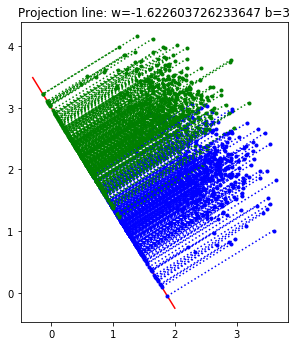

In [25]:
plt.figure(figsize=(4.8, 10))           
plt.plot(c1[:, 0], c1[:, 1], '.', color='blue')
plt.plot(c2[:, 0], c2[:, 1], '.', color='green')
slope = w[1, 0] / w[0, 0]
intercept = 3
x = np.linspace(-0.3, 2, 300)
plt.plot(x, slope * x + intercept, color='red')
a = np.array([[1/slope, 1], [-slope, 1]])
for i in range(c1[:, 0].size):
    b = np.array([1 / slope * c1[i, 0] + c1[i, 1], intercept])
    proj = np.linalg.solve(a, b)
    plt.plot([c1[i, 0], proj[0]], [c1[i, 1], proj[1]], ':b')
    plt.plot(proj[0], proj[1], '.', color='blue')
for i in range(c2[:, 0].size):
    b = np.array([1 / slope * c2[i, 0] + c2[i, 1], intercept])
    proj = np.linalg.solve(a, b)
    plt.plot([c2[i, 0], proj[0]], [c2[i, 1], proj[1]], ':g')
    plt.plot(proj[0], proj[1], '.', color='green')
plt.axis("scaled")
plt.title("Projection line: w=" + str(slope) + " b=" + str(intercept))
plt.show()